In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from scipy import stats
import time
from datetime import datetime

import poloniex

sns.set_style('whitegrid')

In [2]:
from pandas_datareader import DataReader

In [74]:
def savefig(name):
    plt.savefig('../../Output/' + name + '.png')
    plt.savefig('../../Output/' + name + '.pdf')
    plt.savefig('../../Output/' + name + '.svg')

## Get Stock data

In [3]:
tech_name_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] #GAFA
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
for stock in tech_name_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
tech_list = [AAPL, GOOG, MSFT, AMZN]

In [6]:
for stock in tech_list:
    stock.drop('Adj Close', axis=1, inplace=True)

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume
Date,,,,,
2020-04-23,70.437500,68.717499,68.967499,68.757500,124814400.0
2020-04-24,70.752502,69.250000,69.300003,70.742500,126508800.0
2020-04-27,71.135002,69.987503,70.449997,70.792503,117087600.0
2020-04-28,71.457497,69.550003,71.269997,69.644997,112004800.0
2020-04-29,72.417503,70.972504,71.182503,71.932503,137280800.0


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,114.054961,111.048063,112.624141,112.604130,1.315212e+08
std,19.149746,18.582414,19.037392,18.853127,5.227250e+07
min,70.437500,68.717499,68.967499,68.757500,4.669130e+07
25%,97.404999,95.839996,96.692497,96.522499,9.240380e+07
50%,119.199997,116.129997,117.949997,117.339996,1.161204e+08
75%,127.930000,124.720001,126.500000,126.209999,1.550880e+08
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-04-23 to 2021-04-23
Data columns (total 5 columns):
High      253 non-null float64
Low       253 non-null float64
Open      253 non-null float64
Close     253 non-null float64
Volume    253 non-null float64
dtypes: float64(5)
memory usage: 11.9 KB


## Get Coin data

In [10]:
polo = poloniex.Poloniex()
period = polo.DAY # period of data
end = time.time()
start = end - period * 365 # 1 year

coin_name_list = ['BTC', 'ETH', 'XRP', 'DOGE']

In [39]:
for coin in coin_name_list:
    print('USDT_%s'%coin)
    globals()[coin]  = DataFrame.from_dict(
                        polo.returnChartData('USDT_%s'%coin, period=period, start=start, end=end),
                        dtype=float)

USDT_BTC
USDT_ETH
USDT_XRP
USDT_DOGE


In [40]:
timestamp = BTC['date'].values.tolist() # Series -> ndarray -> list
# timestamp -> year/month/day
date = [datetime.fromtimestamp(timestamp[i]).date() for i in range(len(timestamp))]

In [42]:
coin_list = [BTC, ETH, XRP, DOGE]

In [43]:
for COIN in coin_list:
    COIN.drop(['date', 'quoteVolume', 'weightedAverage'], axis=1, inplace=True)
    COIN.index = pd.to_datetime(date)
    COIN.index.name = 'Date'
    COIN.columns = ['High', 'Low', 'Open', 'Close', 'Volume']

In [44]:
BTC.head()

,High,Low,Open,Close,Volume
Date,,,,,
2020-04-24,7502.897565,7502.897565,7502.897565,7502.897565,0.000000e+00
2020-04-25,7696.659932,7439.124738,7503.323928,7538.715711,1.665867e+07
2020-04-26,7700.000000,7483.682284,7538.715711,7694.626301,1.703245e+07
2020-04-27,7788.000000,7624.601700,7694.754048,7773.240743,2.421146e+07
2020-04-28,7777.902604,7661.413123,7776.851464,7741.740465,1.688243e+07


In [45]:
BTC.describe()

,High,Low,Open,Close,Volume
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,24148.683523,22652.368804,23419.270651,23535.100853,3.617279e+07
std,18288.661719,16976.718326,17683.303142,17717.343965,3.288825e+07
min,7502.897565,7439.124738,7502.897565,7502.897565,0.000000e+00
25%,10135.841325,9665.250000,9894.261887,9941.458039,1.226700e+07
50%,13195.491545,12750.287703,12947.022760,12998.456398,2.375357e+07
75%,37598.472381,33429.986441,35738.629943,35879.974991,5.182047e+07
max,64970.000000,62002.871415,63573.512081,63562.975202,2.144015e+08


In [46]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-04-24 to 2021-04-24
Data columns (total 5 columns):
High      366 non-null float64
Low       366 non-null float64
Open      366 non-null float64
Close     366 non-null float64
Volume    366 non-null float64
dtypes: float64(5)
memory usage: 17.2 KB


## Joint Data

In [48]:
brand_list = coin_list
brand_list.extend(tech_list)

brand_name_list = coin_name_list
brand_name_list.extend(tech_name_list)

In [51]:
for df in brand_list:
    df['EMA20'] = df['Open'].ewm(span=20).mean()
    df['SMA50'] = df['Open'].rolling(window=50).mean()
    df['Return'] = df['Open'].pct_change()

In [50]:
df_opens = pd.concat([df['Open'] for df in brand_list], axis=1)
df_opens.columns = brand_name_list
df_opens.dropna(inplace=True)
df_opens.head(10)

,BTC,ETH,XRP,DOGE,AAPL,GOOG,MSFT,AMZN
Date,,,,,,,,
2020-04-24,7502.897565,187.449717,0.192796,0.002078,69.300003,1261.170044,172.059998,2417.000000
2020-04-27,7694.754048,197.516808,0.196254,0.002382,70.449997,1296.000000,176.589996,2443.199951
2020-04-28,7776.851464,196.495000,0.197381,0.002326,71.269997,1287.930054,175.589996,2372.100098
2020-04-29,7741.740465,196.417245,0.214330,0.002321,71.182503,1341.459961,173.220001,2330.010010
2020-04-30,8777.187162,215.428304,0.226369,0.002482,72.489998,1324.880005,180.000000,2419.840088
2020-05-01,8624.959057,206.032030,0.211730,0.002443,71.562500,1328.500000,175.800003,2336.800049
2020-05-04,8894.676990,209.904363,0.219684,0.002498,72.292503,1308.229980,174.490005,2256.379883
2020-05-05,8870.712568,206.591051,0.217782,0.002473,73.764999,1337.920044,180.619995,2340.000000
2020-05-06,9019.509039,205.244899,0.217144,0.002484,75.114998,1361.689941,182.080002,2329.439941


In [52]:
df_returns = pd.concat([df['Return'] for df in brand_list], axis=1)
df_returns.columns = brand_name_list
df_returns.dropna(inplace=True)
df_returns.head(10)

,BTC,ETH,XRP,DOGE,AAPL,GOOG,MSFT,AMZN
Date,,,,,,,,
2020-04-27,0.020698,0.017444,0.011200,0.120971,0.016594,0.027617,0.026328,0.010840
2020-04-28,0.010669,-0.005173,0.005742,-0.023169,0.011639,-0.006227,-0.005663,-0.029101
2020-04-29,-0.004515,-0.000396,0.085869,-0.002235,-0.001228,0.041563,-0.013497,-0.017744
2020-04-30,0.133749,0.096789,0.056167,0.069233,0.018368,-0.012360,0.039141,0.038554
2020-05-01,-0.017344,-0.043617,-0.064669,-0.015528,-0.012795,0.002732,-0.023333,-0.034316
2020-05-04,-0.008586,-0.019102,-0.018016,-0.020463,0.010201,-0.015258,-0.007452,-0.034415
2020-05-05,-0.002694,-0.015785,-0.008662,-0.009953,0.020369,0.022695,0.035131,0.037059
2020-05-06,0.016774,-0.006516,-0.002927,0.004351,0.018301,0.017766,0.008083,-0.004513
2020-05-07,0.013980,-0.030879,-0.025109,-0.003897,0.009186,0.003121,0.011478,0.019464


## Correlation

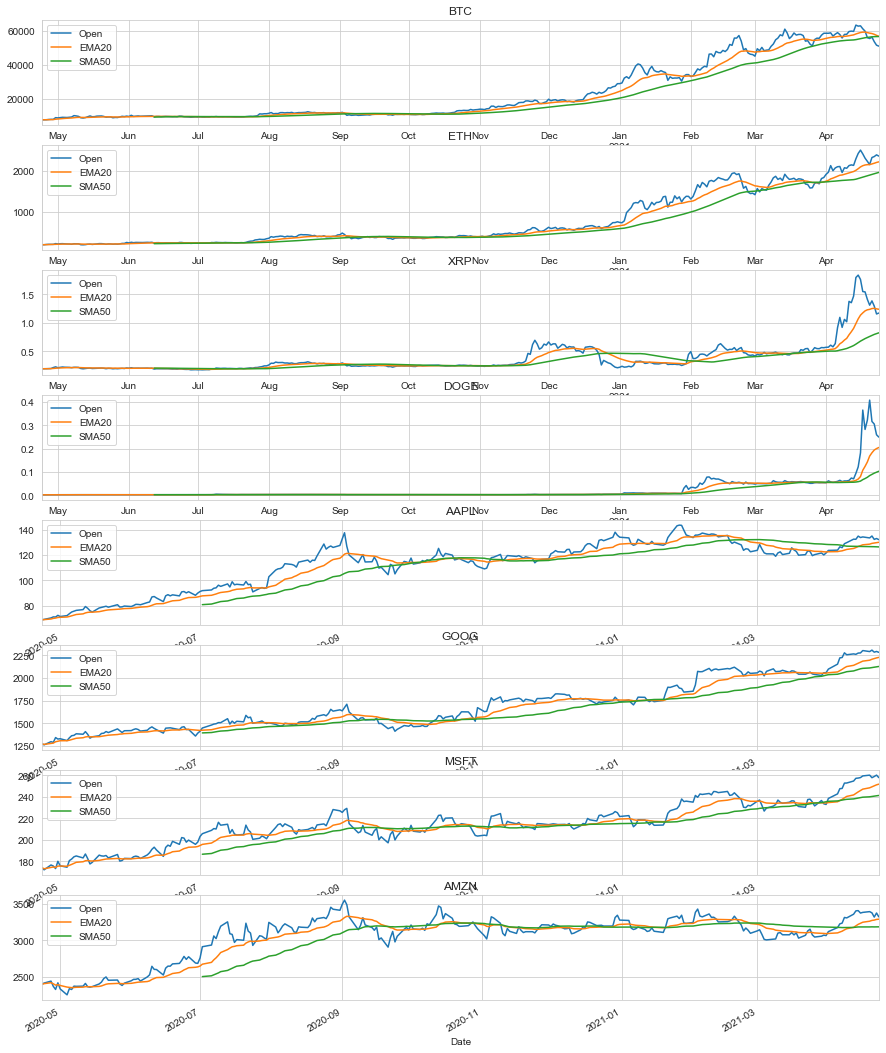

In [90]:
fig, axes = plt.subplots(nrows=len(brand_list), ncols=1, figsize=(15, 20))

for i, (df, title) in enumerate(zip(brand_list, brand_name_list)):
    df[['Open', 'EMA20', 'SMA50']].plot(ax=axes[i], subplots=False, title=title)

savefig('prices')

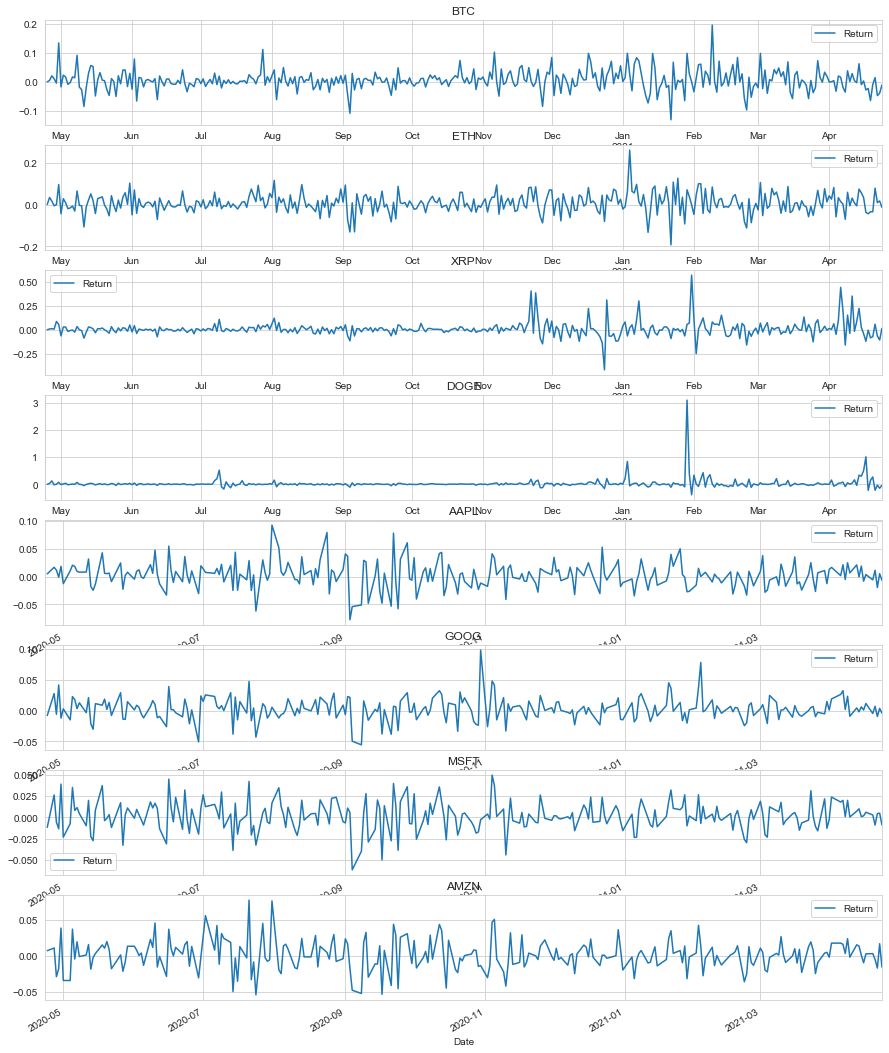

In [92]:
fig, axes = plt.subplots(nrows=len(brand_list), ncols=1, figsize=(15, 20))

for i, (df, title) in enumerate(zip(brand_list, brand_name_list)):
    df[['Return']].plot(ax=axes[i], subplots=False, title=title)
    
savefig('returns')

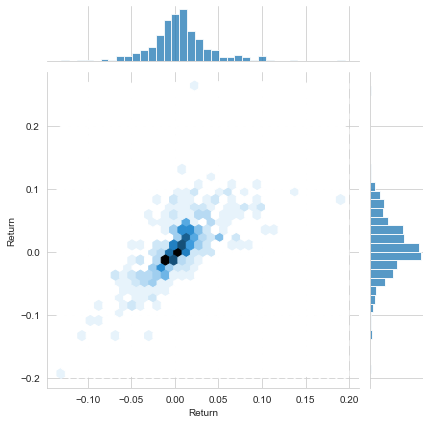

In [57]:
sns.jointplot(x=BTC['Return'], y=ETH['Return'], kind='hex')

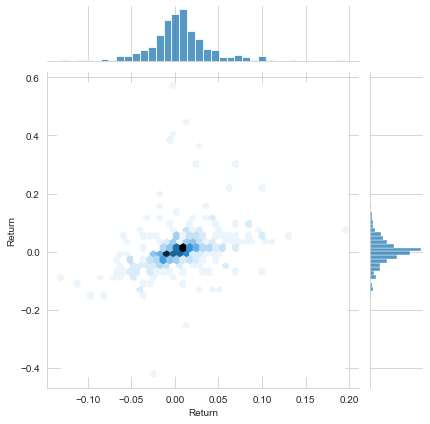

In [58]:
sns.jointplot(x=BTC['Return'], y=XRP['Return'], kind='hex')

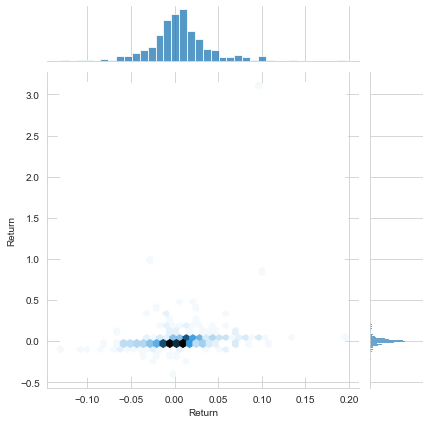

In [60]:
sns.jointplot(x=BTC['Return'], y=DOGE['Return'], kind='hex')

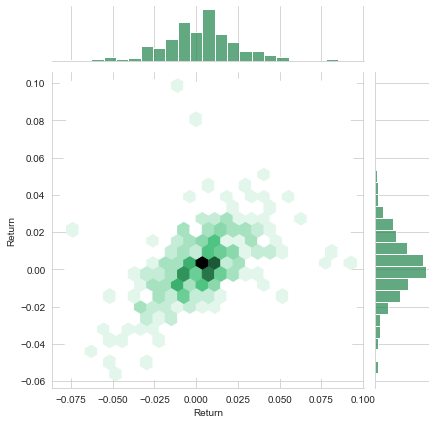

In [61]:
sns.jointplot(x=AAPL['Return'], y=GOOG['Return'], kind='hex', color='seagreen')

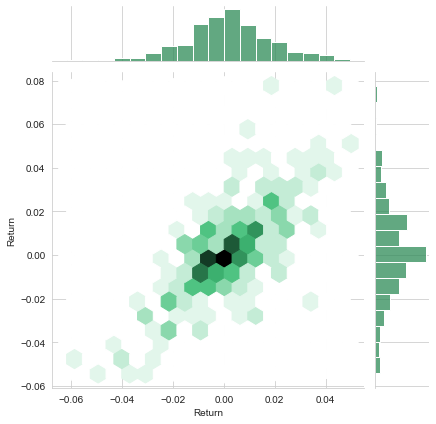

In [62]:
sns.jointplot(x=MSFT['Return'], y=AMZN['Return'], kind='hex', color='seagreen')

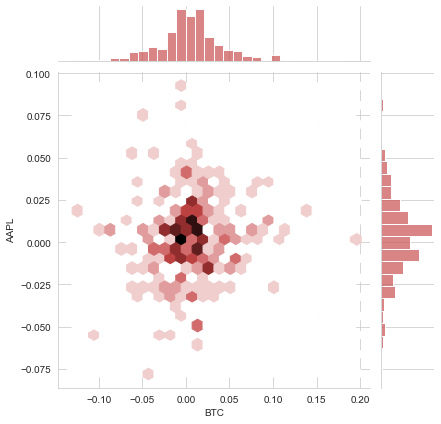

In [65]:
sns.jointplot(x=df_returns['BTC'], y=df_returns['AAPL'], kind='hex', color='indianred')

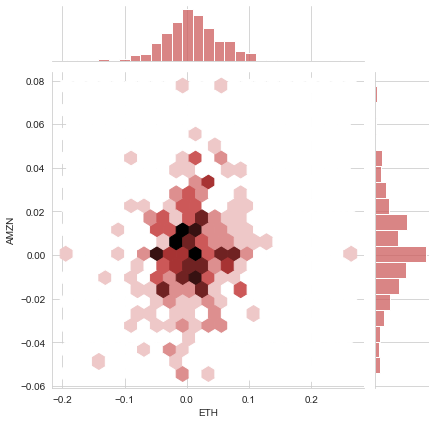

In [66]:
sns.jointplot(x=df_returns['ETH'], y=df_returns['AMZN'], kind='hex', color='indianred')

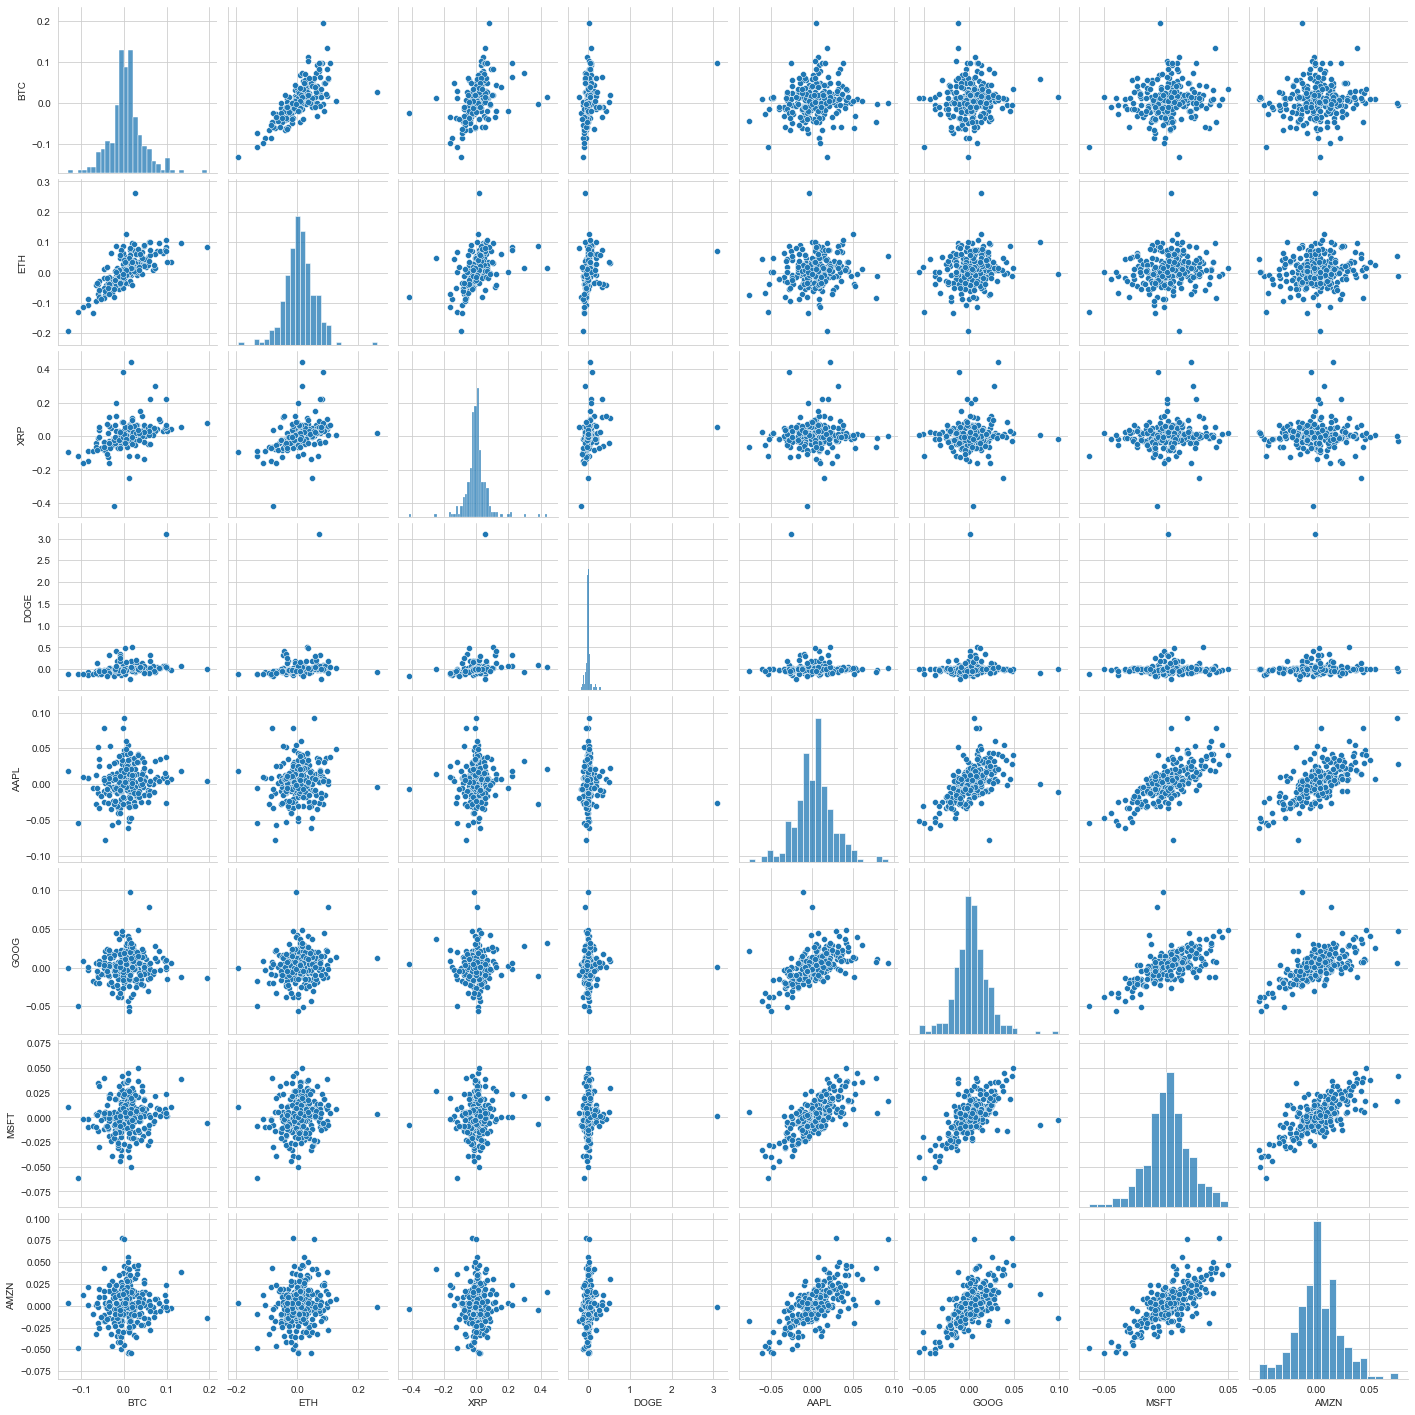

In [73]:
sns.pairplot(df_returns.dropna())
saveFig('pairplot_return')

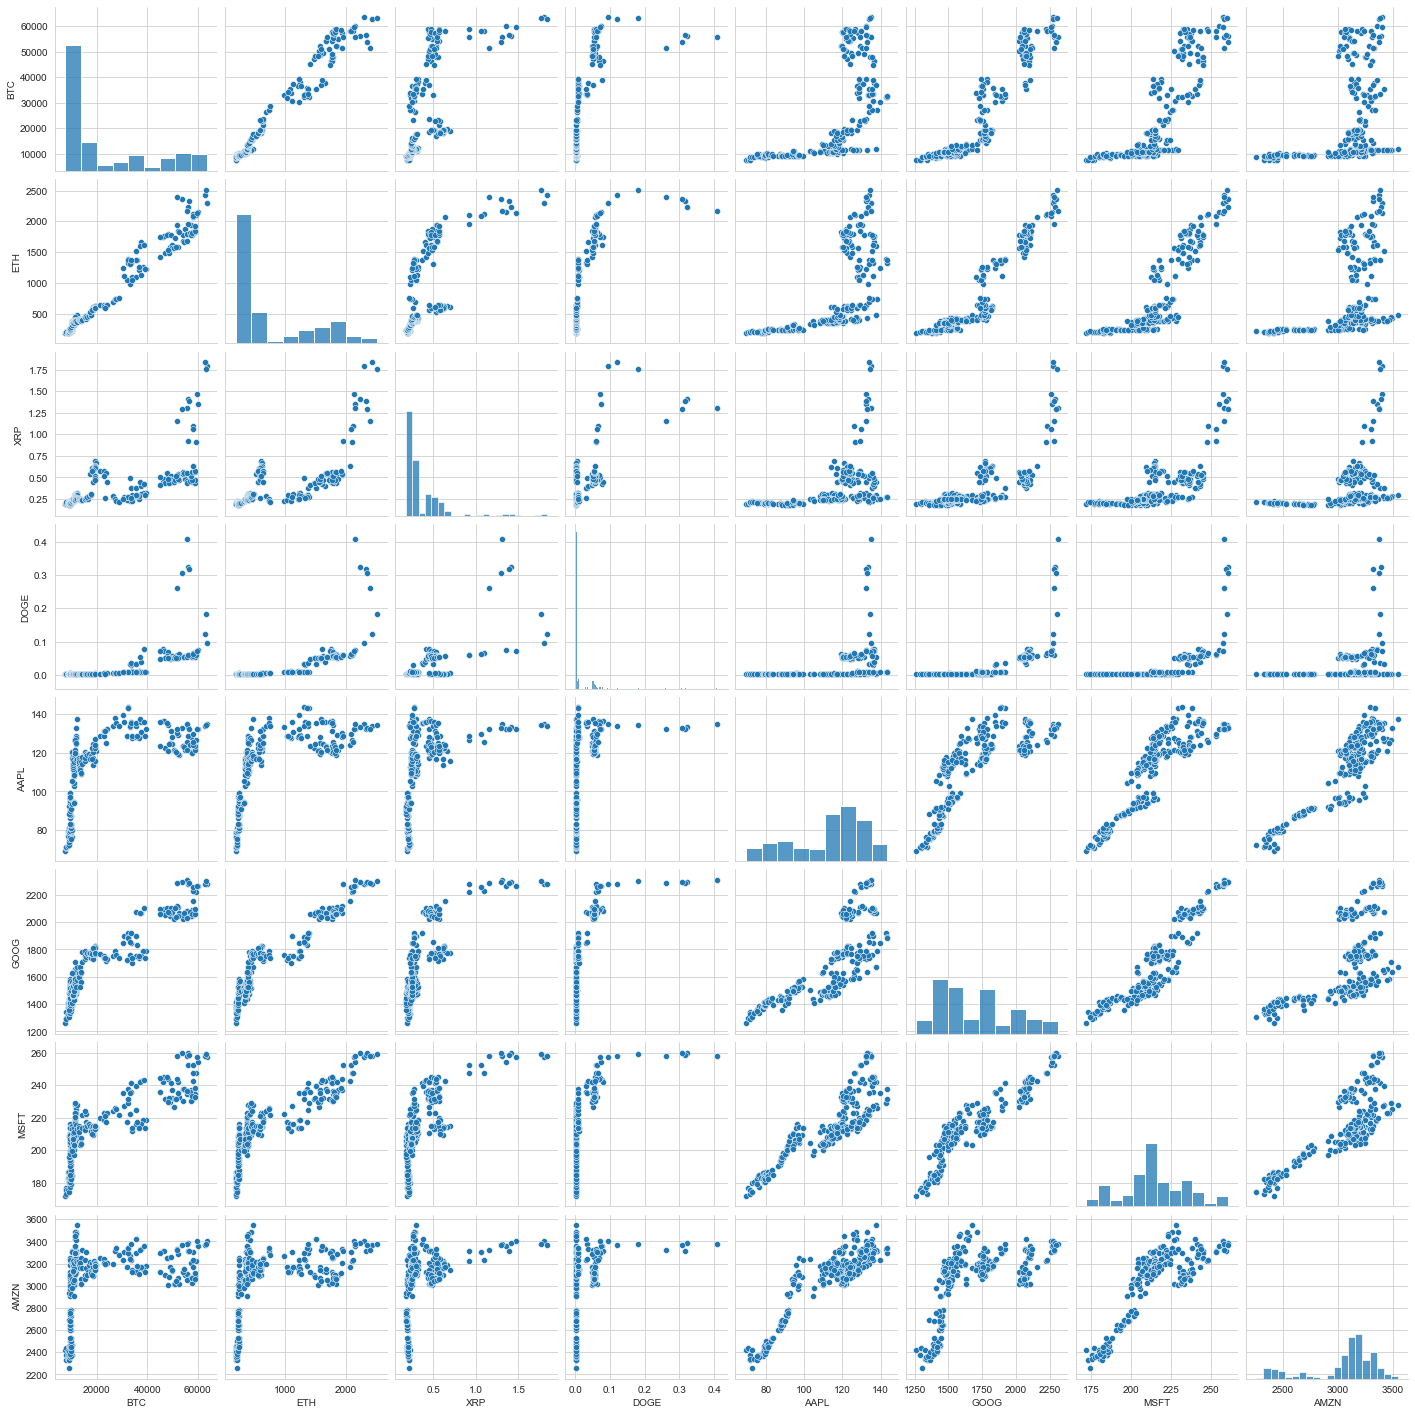

In [75]:
sns.pairplot(df_opens.dropna())
savefig('pairplot_open')

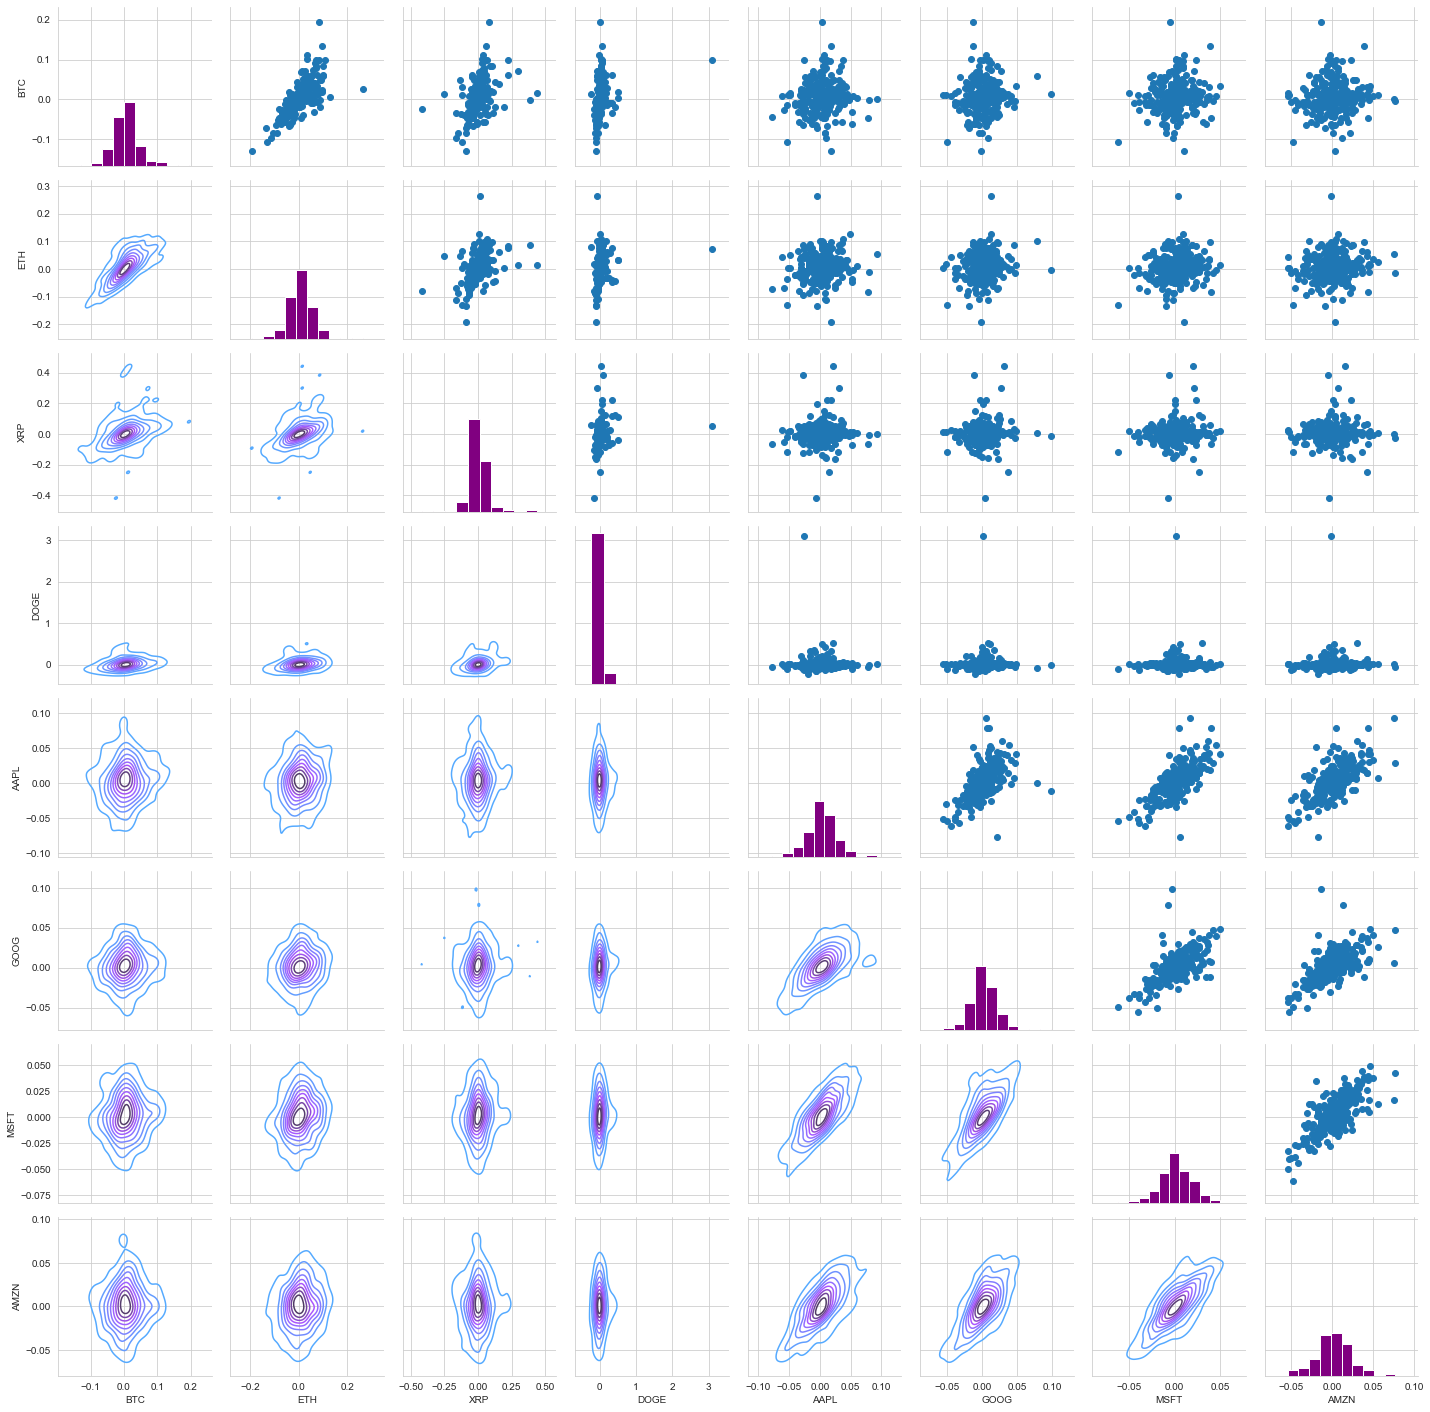

In [76]:
fig = sns.PairGrid(df_returns)
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(plt.hist, color='purple')
savefig('pairgrid_return')

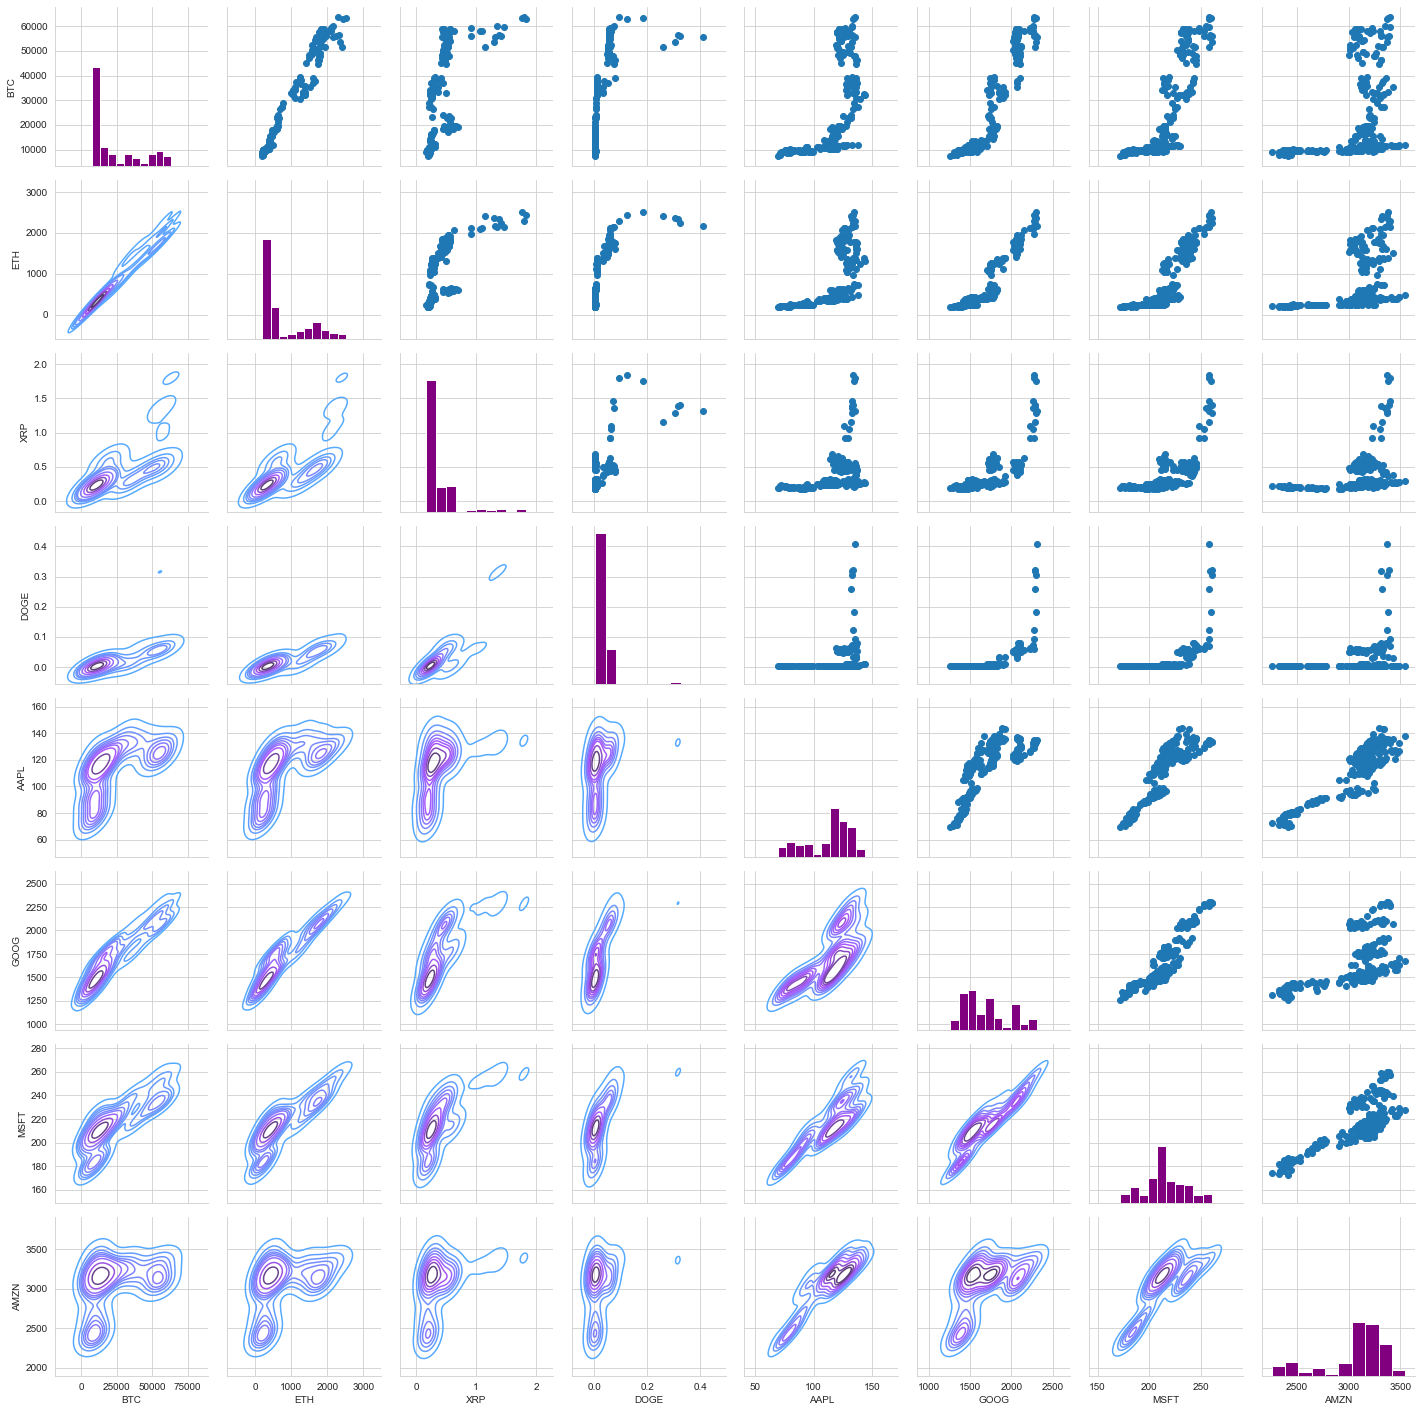

In [77]:
fig = sns.PairGrid(df_opens)
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(plt.hist, color='purple')
savefig('pairgrid_open')

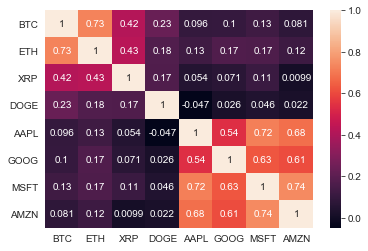

In [78]:
sns.heatmap(df_returns.corr(), annot=True)

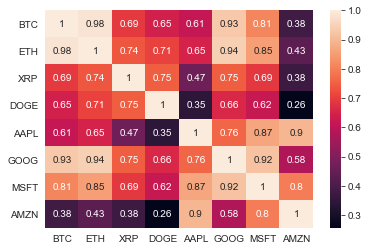

In [79]:
sns.heatmap(df_opens.corr(), annot=True)